# K-Means Clustering 

this algorithm tries to find the center of cluster that are representatives from the data
and then find the belonging cluster from each data and update the center of cluster

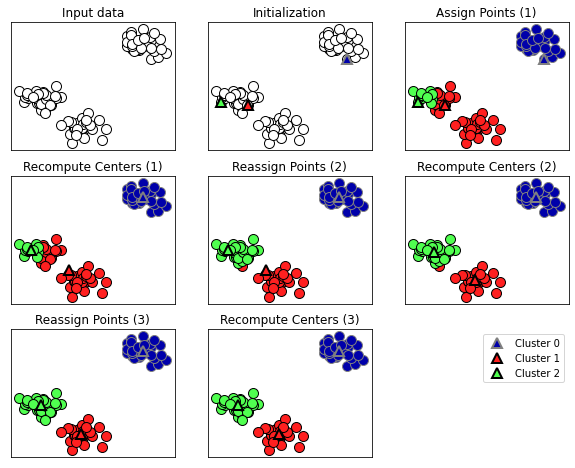

In [2]:
# k-means example
import mglearn
mglearn.plots.plot_kmeans_algorithm()

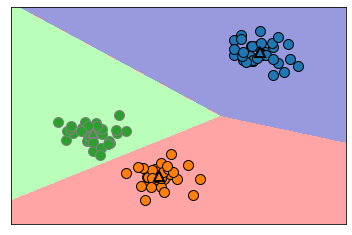

In [3]:
mglearn.plots.plot_kmeans_boundaries()

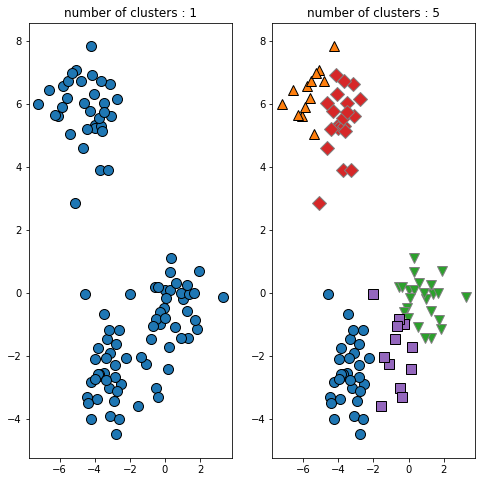

In [8]:
# sample implementation using make_blob
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs()

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
for i, ax in zip([1, 5], [0,1]):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)

    labels = kmeans.labels_
    # label is an array contains
    # the clusters label for each data
    
    mglearn.discrete_scatter(X[:, 0], X[:,1], labels, ax=axes[ax])
    axes[ax].set_title("number of clusters : %d" % i)

Text(0, 0.5, 'Feature 1')

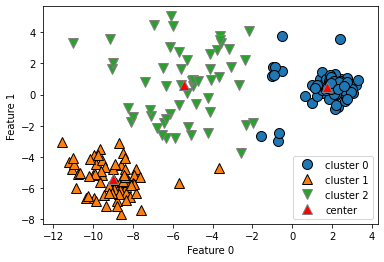

In [16]:
# Kmeans have a problem when the data have
# different density
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_varied)
y_pred = kmeans.predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
mglearn.discrete_scatter(   kmeans.cluster_centers_[:, 0],
                            kmeans.cluster_centers_[:, 1],
                            markers='^', c="red")

plt.legend(["cluster 0", "cluster 1", "cluster 2", "center"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

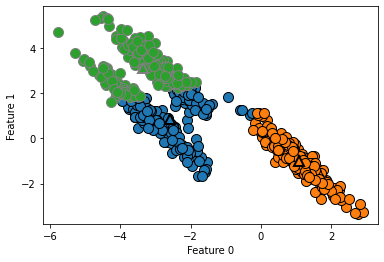

In [17]:
# kmeans consider the directions of the data point
import numpy as np

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'feature 1')

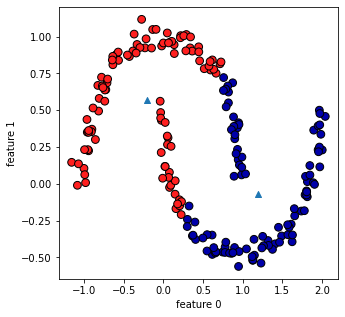

In [26]:
# testing kmeans using the moons dataset
# the model performs poorly with more complex
# data

from sklearn.datasets import make_moons

X,y = make_moons(n_samples=200, noise=.05)

kmeans = KMeans(n_clusters=2).fit(X)
y_pred = kmeans.predict(X)

# visualization
plt.figure(figsize=(5,5))
# visualizing the data
plt.scatter(X[:, 0], X[:, 1], s=60, c=y_pred, cmap=mglearn.cm2, edgecolor='k')
# visualizing the center of clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='^', cmap=[mglearn.cm2(0), mglearn.cm2(1)])
plt.xlabel("feature 0")
plt.ylabel("feature 1")